In [126]:
# Importando bibliotecas
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB

# Importar a biblioteca para mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Plotar gráficos
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [127]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/labor.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [128]:
# Remover a coluna TBG onde todos os valores são NaN
data.drop(["TBG"], axis=1, inplace=True)

# Atualizar ? para NaN
data = data.mask(data == '?')

In [129]:
data.nunique()

age                             93
sex                              2
'on thyroxine'                   2
'query on thyroxine'             2
'on antithyroid medication'      2
sick                             2
pregnant                         2
'thyroid surgery'                2
'I131 treatment'                 2
'query hypothyroid'              2
'query hyperthyroid'             2
lithium                          2
goitre                           2
tumor                            2
hypopituitary                    2
psych                            2
'TSH measured'                   2
TSH                            287
'T3 measured'                    2
T3                              69
'TT4 measured'                   2
TT4                            241
'T4U measured'                   2
T4U                            146
'FTI measured'                   2
FTI                            234
'TBG measured'                   1
'referral source'                5
Class               

In [130]:
# Atualizar NaN para o modo da coluna
data.dropna(subset=['age'], inplace=True, axis=0) # Remover a unica linha nula de idade
# Atualizar valores moda:
data.fillna(data['sex'].mode(), inplace=True)
# Atualizar valores media:
colunas_nulas_media = ["TSH", "T3", "TT4", "T4U", "FTI"]
for column in colunas_nulas_media:
    data[column].fillna(data[column].mode(), inplace=True)

In [131]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data['Class']
data.drop(["Class"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data, columns=["'referral source'"])
data.drop(["'referral source'"], axis=1, inplace=True)

In [132]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
# node-caps: faltantes
for column in data.columns:
  treinamento_dados[column] = labelencoder.fit_transform(treinamento_dados[column])

In [133]:
# Separar dados de treinamento e de testes
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.20, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


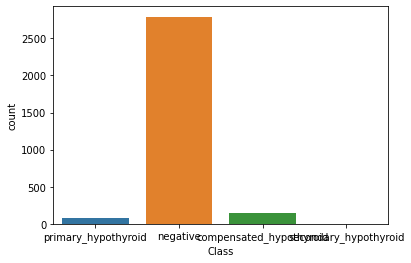

In [134]:
sns.countplot(dataset_treino_class)

In [135]:
smote = RandomOverSampler()
# smote = RandomUnderSampler()
dataset_treino, dataset_treino_class = smote.fit_resample(dataset_treino, dataset_treino_class)
dataset_teste, dataset_teste_class = smote.fit_resample(dataset_teste, dataset_teste_class)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


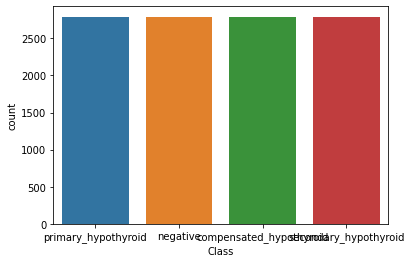

In [136]:
sns.countplot(dataset_treino_class)

In [137]:
# Criar e treinar árvore de decisão
tree_data = DecisionTreeClassifier(criterion="entropy")
tree_data.fit(dataset_treino, dataset_treino_class)

DecisionTreeClassifier(criterion='entropy')

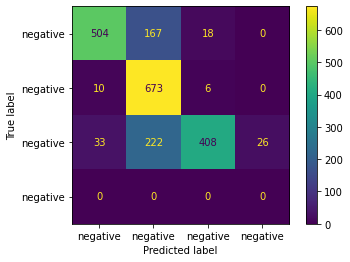

In [138]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_data.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [139]:
# Mostrar métricas
print('Árvore')
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_data.predict(dataset_teste)))
print(classification_report(dataset_teste_class, tree_data.predict(dataset_teste)))

Árvore
Accuracy score =  0.7668118045476536
                         precision    recall  f1-score   support

compensated_hypothyroid       0.92      0.73      0.82       689
               negative       0.63      0.98      0.77       689
    primary_hypothyroid       0.94      0.59      0.73       689
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.77      2067
              macro avg       0.62      0.58      0.58      2067
           weighted avg       0.83      0.77      0.77      2067



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
# Criar e treinar Naive Bayes
gnb = GaussianNB()
gnb.fit(dataset_treino, dataset_treino_class)

GaussianNB()

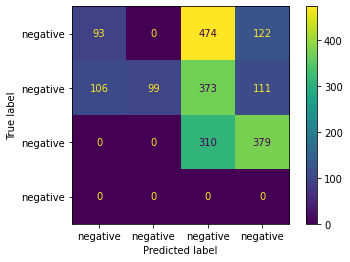

In [141]:
conf_matrix = confusion_matrix(dataset_teste_class, gnb.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [142]:
# Mostrar métricas
print('Naive Bayes')
print("Accuracy score = ", accuracy_score(dataset_teste_class, gnb.predict(dataset_teste)))
print(classification_report(dataset_teste_class, gnb.predict(dataset_teste)))

Naive Bayes
Accuracy score =  0.24286405418480891
                         precision    recall  f1-score   support

compensated_hypothyroid       0.47      0.13      0.21       689
               negative       1.00      0.14      0.25       689
    primary_hypothyroid       0.27      0.45      0.34       689
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.24      2067
              macro avg       0.43      0.18      0.20      2067
           weighted avg       0.58      0.24      0.27      2067



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
rforest = RandomForestClassifier(max_features="sqrt")
rforest.fit(dataset_treino, dataset_treino_class)

RandomForestClassifier(max_features='sqrt')

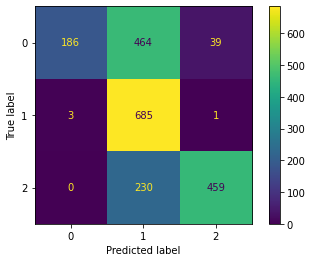

In [144]:
conf_matrix = confusion_matrix(dataset_teste_class, rforest.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix)
cmd.plot(values_format="d")
plt.show()

In [145]:
# Mostrar métricas
print('Random Forest')
print("Accuracy score = ", accuracy_score(dataset_teste_class, rforest.predict(dataset_teste)))
print(classification_report(dataset_teste_class, rforest.predict(dataset_teste)))

Random Forest
Accuracy score =  0.6434446057087566
                         precision    recall  f1-score   support

compensated_hypothyroid       0.98      0.27      0.42       689
               negative       0.50      0.99      0.66       689
    primary_hypothyroid       0.92      0.67      0.77       689

               accuracy                           0.64      2067
              macro avg       0.80      0.64      0.62      2067
           weighted avg       0.80      0.64      0.62      2067

